<a href="https://colab.research.google.com/github/advaymehta009/airb/blob/master/elylilly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
%pwd
%cd ~//Downloads/music_genre

C:\Users\advay\Downloads\music_genre


In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

In [35]:
train_df = pd.read_csv("dataset/train.csv")
test_df = pd.read_csv("dataset/test.csv")

In [36]:
train_df

,instance_id,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,voice_gender,mode,speechiness,tempo,musician_category,valence,music_genre
0,MSC_83537.0,Estrellitas y Duendes,49.178,0.970522,0.580508,214625.776,0.192107,0.000000,Scale E,0.147134,-14.140,NaN,Major,0.046404,143.78799999999998,Band,0.598965,Jazz
1,MSC_22044.0,Al Norte,59.827,1.009380,0.687542,216232.195,0.265942,0.000031,Scale A,0.174655,-13.716,Male,?,0.039949,?,Band,0.357194,Jazz
2,MSC_62017.0,Yeah! (feat. Lil Jon & Ludacris),89.023,0.020041,0.967948,273314.723,0.857411,0.000000,Scale D,0.042030,-4.995,Female,Major,0.119917,105.01799999999999,Band,0.635525,Rap
3,MSC_76365.0,Can’t You See,55.762,0.010284,0.616287,189189.605,0.970513,0.000220,Scale D,0.124637,-4.262,Both,Major,0.167493,?,Duet,0.983750,Rock
4,MSC_71493.0,"Sonata III (G Moll), BWV 1029: Adagio",45.095,0.858769,0.280645,410136.987,0.114732,0.002753,Scale F Sharp,0.134782,-26.922,Female,Minor,0.039139,112.18299999999999,Band,0.074412,Classical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15676,MSC_73047.0,I. Andante,0.000,0.866988,0.387476,-1.000,0.196799,0.028725,Scale B,0.248399,-16.331,Female,Major,0.045251,123.516,Band,0.624518,Classical
15677,MSC_34472.0,Only Trust Your Heart,40.514,0.883333,0.459917,378128.464,0.349263,0.000519,Scale F,0.681492,-25.087,Both,Major,0.448377,129.445,Duet,0.609022,Jazz
15678,MSC_32827.0,Moment's Notice,35.082,0.905281,0.566619,581799.061,0.543673,0.209238,Scale D Sharp,0.416611,-10.246,Female,Major,0.040625,123.17,NaN,0.869294,Jazz
15679,MSC_89976.0,Such Small Scenes,59.693,0.113408,0.644554,151226.592,0.912201,0.000089,Scale F,0.166336,-7.257,Both,Minor,0.060308,116.07700000000001,Duet,0.402700,Rock


# **Training Dataset features:**
instance_id <br>
track_name <br>
**popularity**<br>
**acousticness**<br>
**danceability**<br>
**duration_ms** <br>
**energy** <br>
**instrumentalness**<br>
**key** : Sharpness (categorical feature) <br>
**liveness** <br>
**loudness**<br>
**voice_gender** : (male, female, duet - categorical feature) <br>
**mode** : (major, mode) <br>
**speechiness** <br>
**tempo** <br>
**musician_category** : (musician_category) <br>
**valence** <br><br>
### Target Feature : **music_genre** <br>


 

In [37]:
train_df.columns

Index(['instance_id', 'track_name', 'popularity', 'acousticness',
       'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key',
       'liveness', 'loudness', 'voice_gender', 'mode', 'speechiness', 'tempo',
       'musician_category', 'valence', 'music_genre'],
      dtype='object')

In [38]:
train_df.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence
count,15039.000000,15681.000000,15125.000000,1.558700e+04,15587.000000,15586.000000,15681.000000,15645.000000,15655.000000,15004.000000
mean,50.822720,0.446922,0.570106,2.480008e+05,0.426977,0.264290,0.194089,-11.621471,0.096411,0.451400
std,17.679789,0.416981,0.215045,1.568312e+05,0.514145,0.395788,0.160291,8.663364,0.105647,0.277220
min,0.000000,0.000002,0.063962,-1.000000e+00,-1.000000,0.000000,0.016652,-50.054000,0.023858,0.000000
25%,39.017000,0.044521,0.418635,1.860163e+05,0.158277,0.000000,0.101674,-15.504000,0.039549,0.212242
50%,54.109000,0.295272,0.586114,2.362127e+05,0.560389,0.000719,0.128784,-8.611000,0.050425,0.432478
75%,63.449000,0.929001,0.733073,2.975593e+05,0.791881,0.638930,0.228973,-5.715000,0.094230,0.665369
max,108.512000,1.094410,1.072089,3.410383e+06,1.094853,1.078601,1.080959,1.389000,1.000445,1.076971


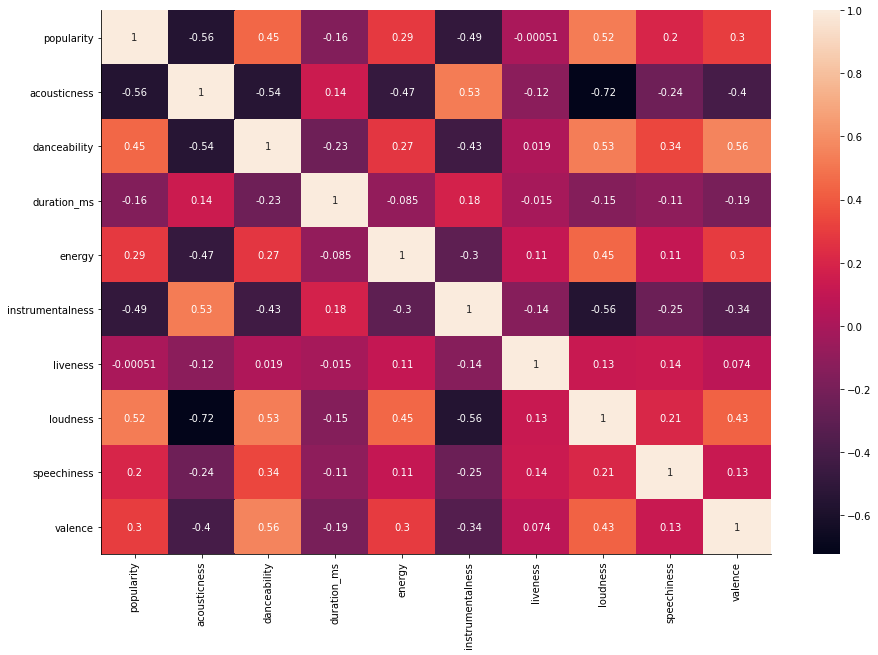

In [39]:
corr = train_df.corr()
g = sns.heatmap(corr, annot=True)
sns.despine()
g.figure.set_size_inches(15,10)
plt.show()

In [40]:
useful_corr = corr[(corr >= 0.15) & (corr < 1)]
# useful_corr

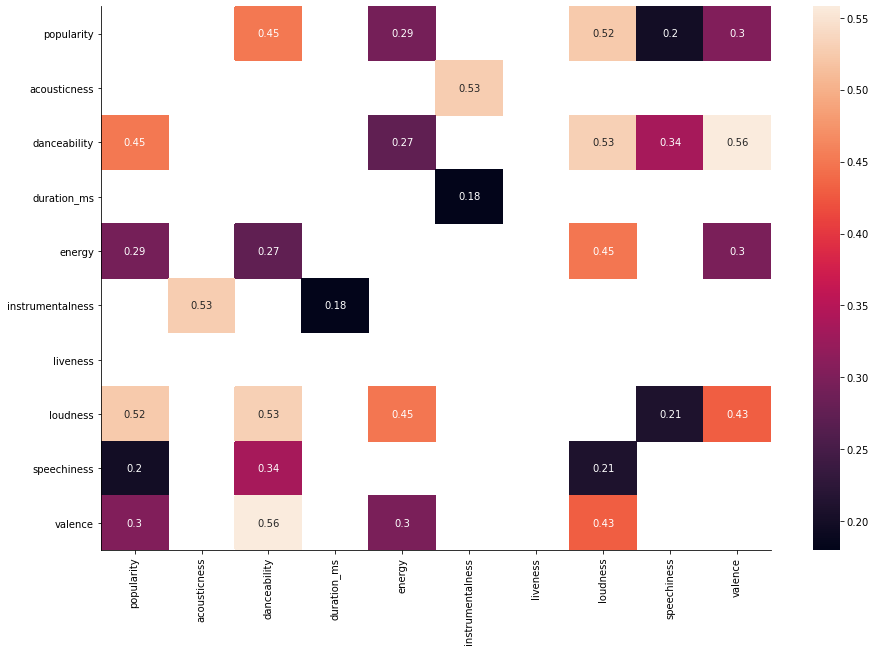

In [41]:
g = sns.heatmap(useful_corr, annot=True)
sns.despine()
g.figure.set_size_inches(15,10)
plt.show()

In [42]:
#popularity
train_df.popularity.describe()

count    15039.000000
mean        50.822720
std         17.679789
min          0.000000
25%         39.017000
50%         54.109000
75%         63.449000
max        108.512000
Name: popularity, dtype: float64

In [80]:
df = train_df.copy()
sc = MinMaxScaler()
num_df = sc.fit_transform(df[['popularity', 'acousticness',
       'danceability', 'duration_ms', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'valence']])
num_df = pd.DataFrame(num_df, columns=['popularity', 'acousticness',
       'danceability', 'duration_ms', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'valence'])
num_df

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence
0,0.453203,0.886799,0.512382,0.062933,0.569065,0.000000,0.122598,0.698132,0.023086,0.556157
1,0.551340,0.922305,0.618553,0.063404,0.604311,0.000028,0.148456,0.706374,0.016477,0.331665
2,0.820398,0.018311,0.896699,0.080142,0.886655,0.000000,0.023844,0.875901,0.098362,0.590104
3,0.513879,0.009395,0.547873,0.055475,0.940645,0.000204,0.101460,0.890150,0.147079,0.913441
4,0.415576,0.784686,0.214936,0.120262,0.532129,0.002553,0.110992,0.449663,0.015648,0.069094
...,...,...,...,...,...,...,...,...,...,...
15676,0.000000,0.792196,0.320906,0.000000,0.571305,0.026631,0.217744,0.655541,0.021906,0.579883
15677,0.373360,0.807131,0.392763,0.110876,0.644085,0.000481,0.624669,0.485333,0.434696,0.565495
15678,0.323301,0.827186,0.498604,0.170597,0.736888,0.193990,0.375793,0.773827,0.017169,0.807166
15679,0.550105,0.103623,0.575911,0.044343,0.912809,0.000082,0.140640,0.831930,0.037324,0.373919


In [81]:
df.columns

Index(['instance_id', 'track_name', 'popularity', 'acousticness',
       'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key',
       'liveness', 'loudness', 'voice_gender', 'mode', 'speechiness', 'tempo',
       'musician_category', 'valence', 'music_genre'],
      dtype='object')

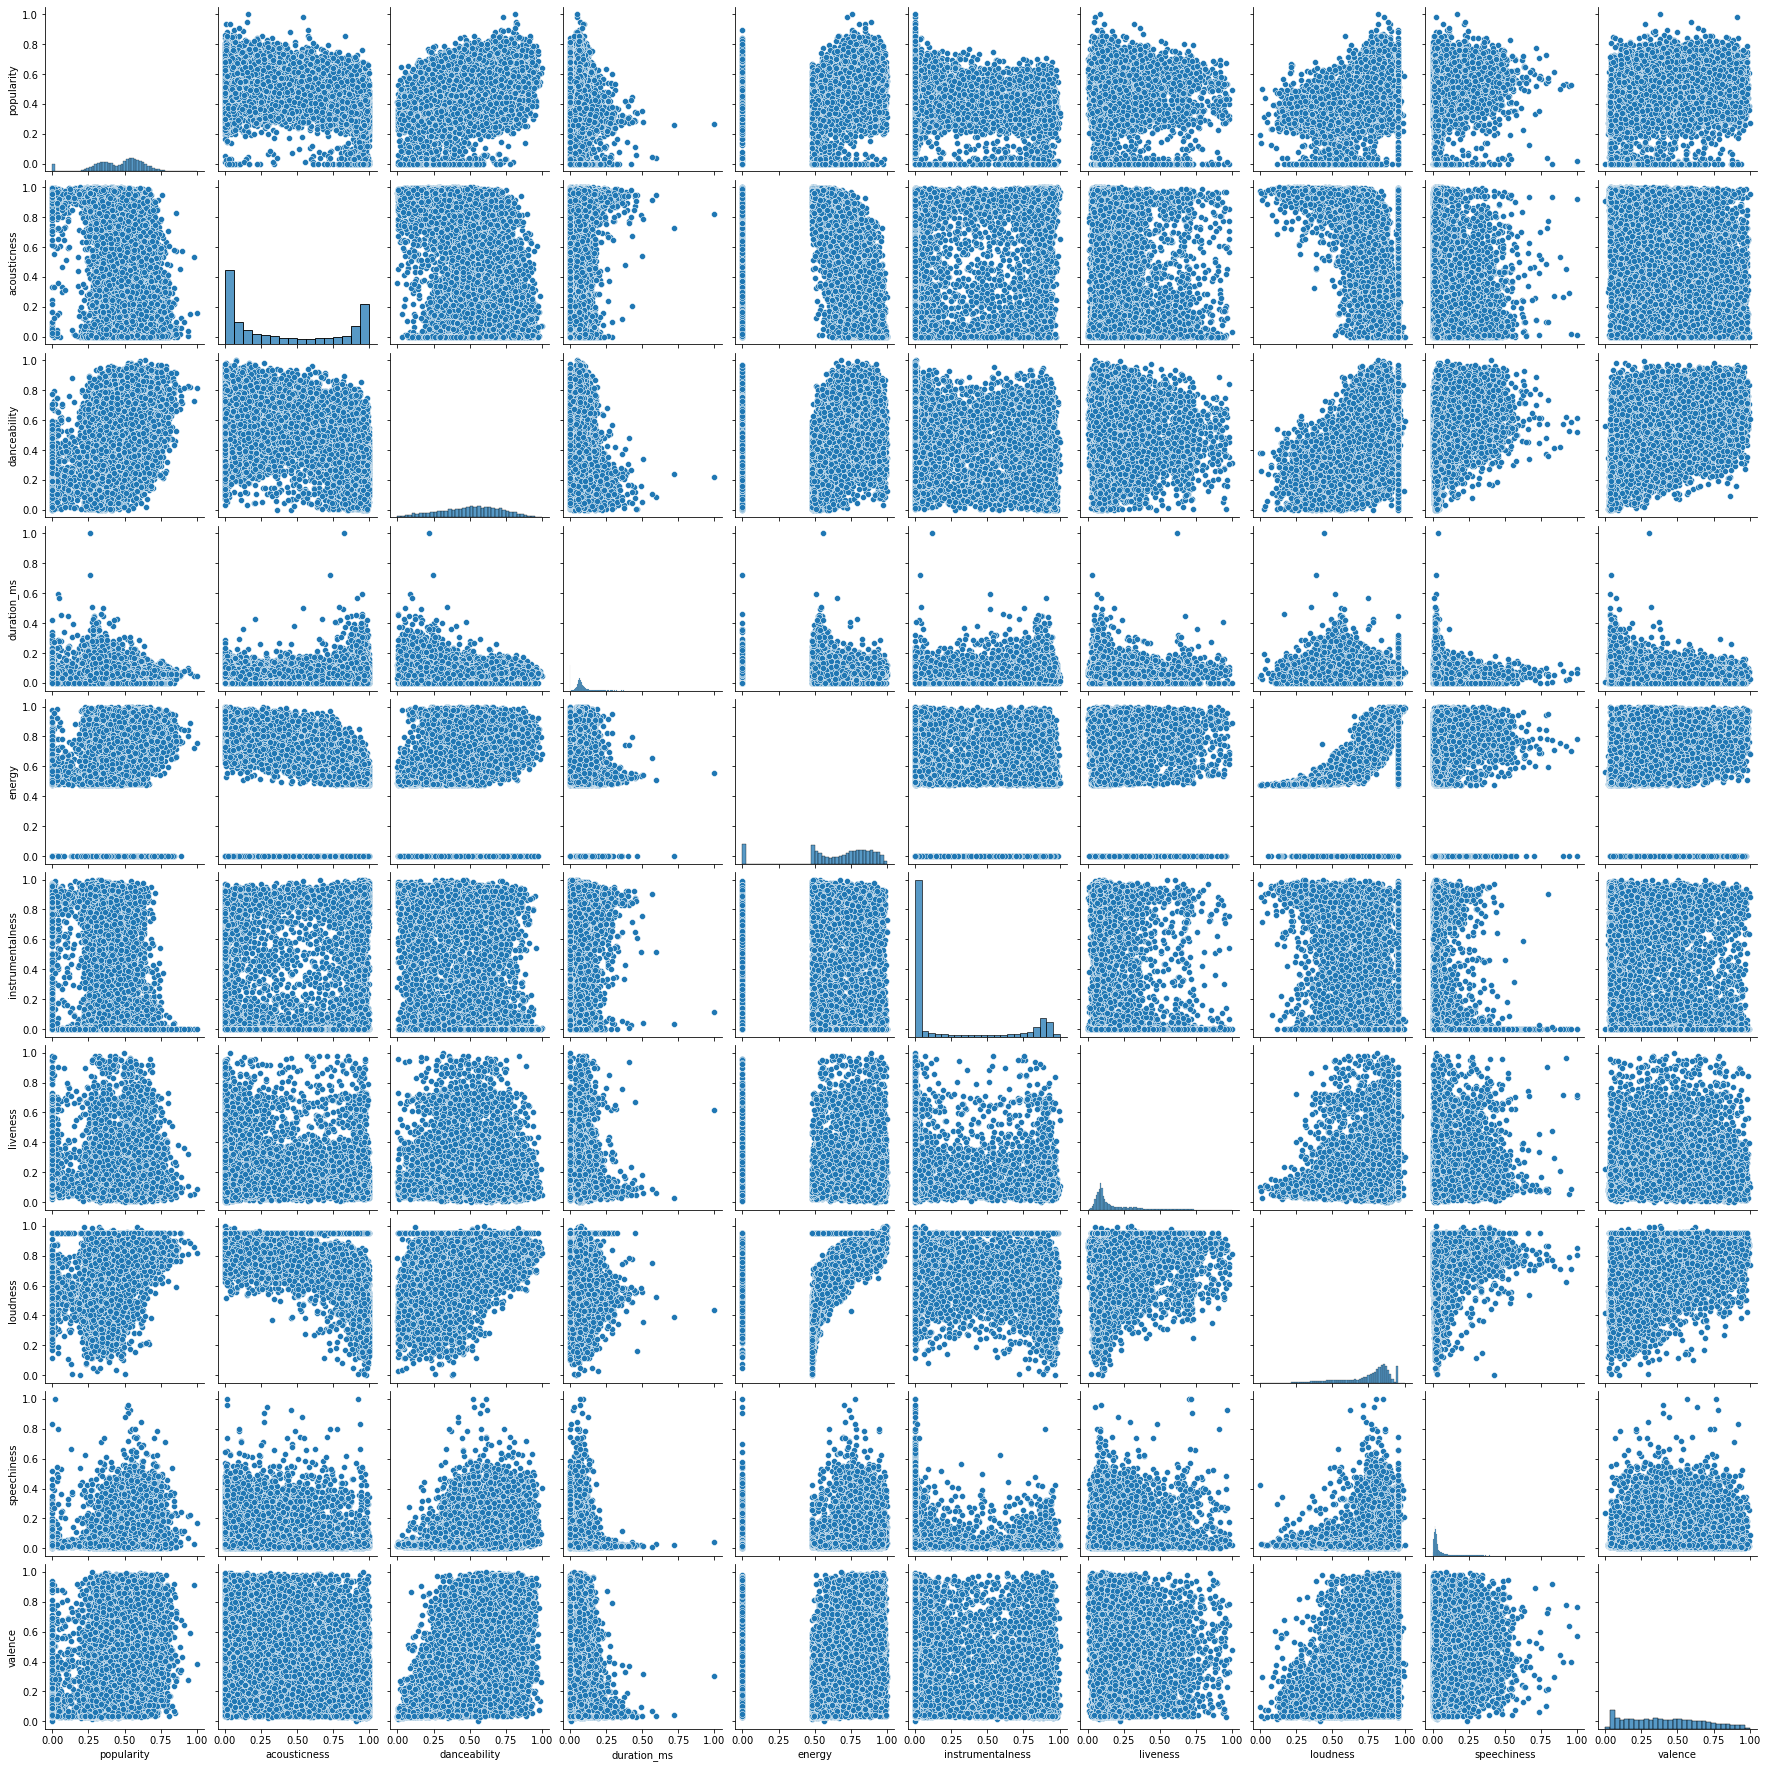

In [82]:
sns.pairplot(num_df)

<AxesSubplot:xlabel='acousticness', ylabel='loudness'>

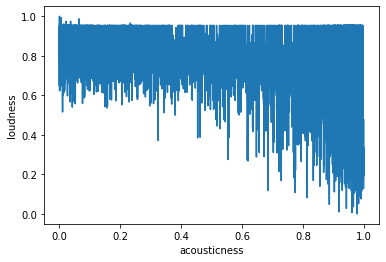

In [83]:
sns.lineplot(x=num_df['acousticness'], y=num_df['loudness'])

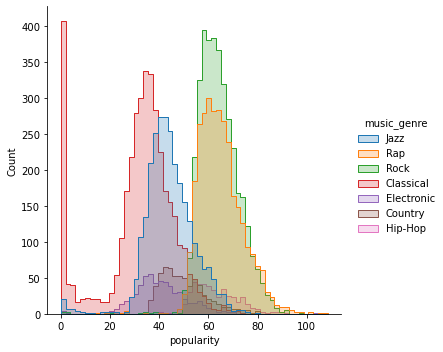

In [85]:
cols = ['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence']

sns.displot(df, x="popularity", hue="music_genre", element='step')

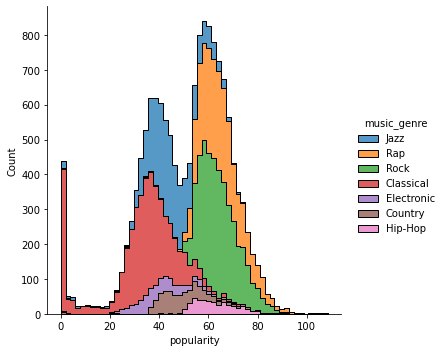

In [89]:
sns.displot(df, x="popularity", hue="music_genre", element='step', multiple='stack')

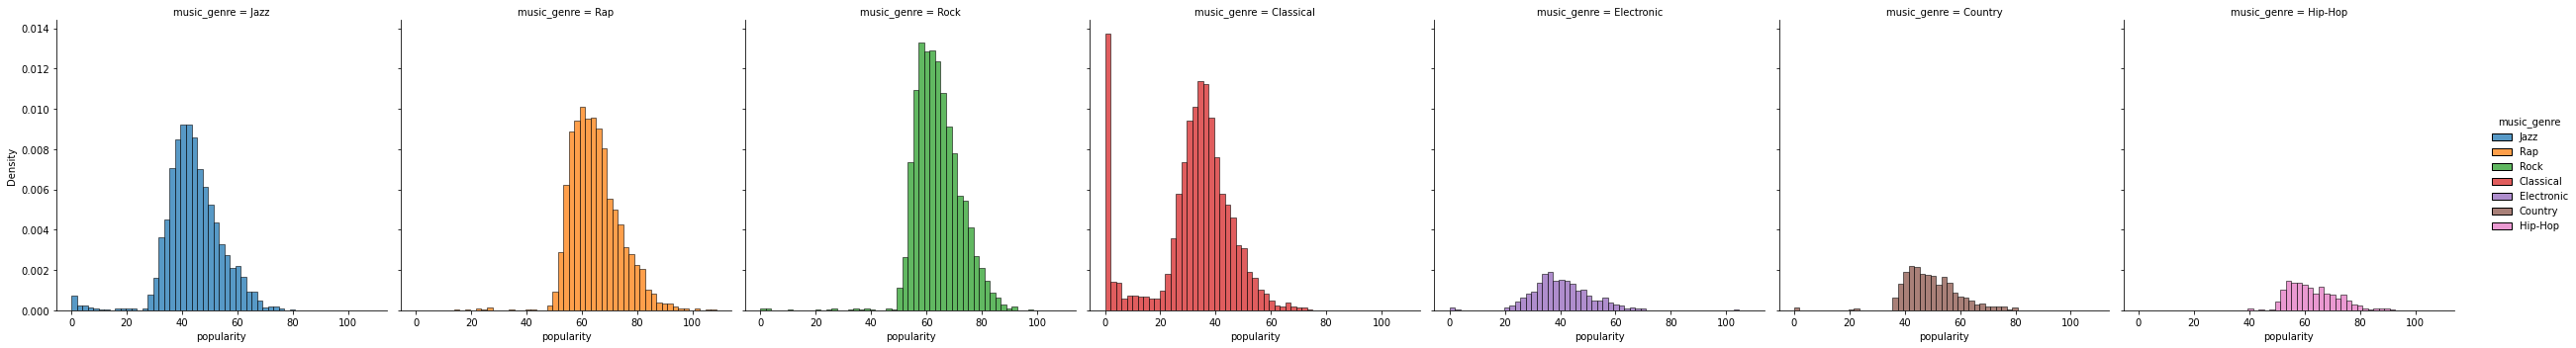

In [100]:
sns.displot(df, x="popularity", col="music_genre", hue='music_genre', stat='density')

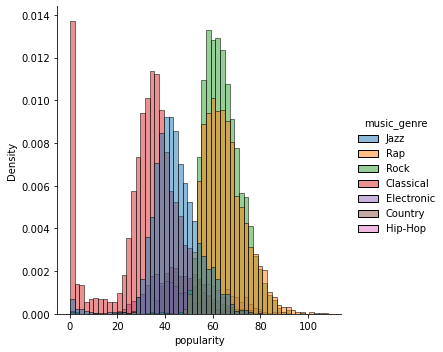

In [95]:
sns.displot(df, x="popularity", hue="music_genre", stat="density")

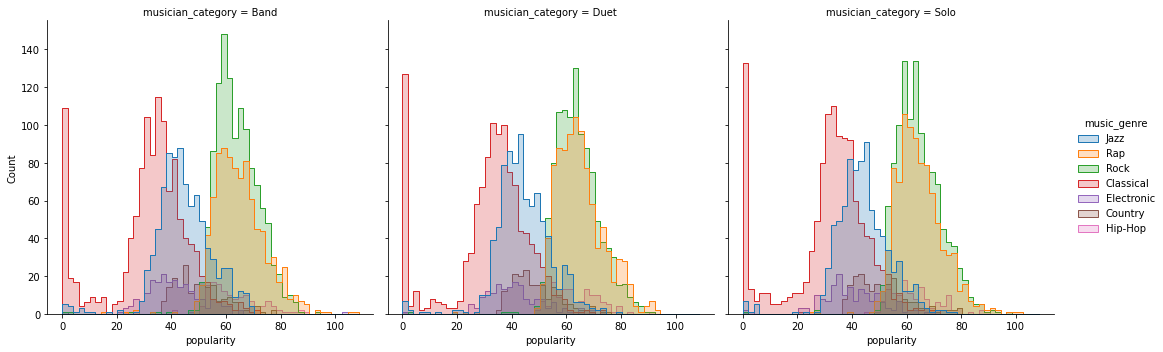

In [105]:
sns.displot(df, x="popularity", hue="music_genre", element='step', col='musician_category')

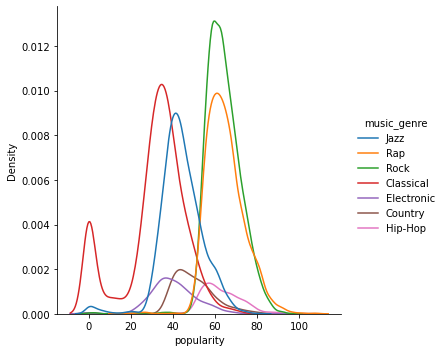

In [106]:
sns.displot(df, x="popularity", hue='music_genre', kind="kde")

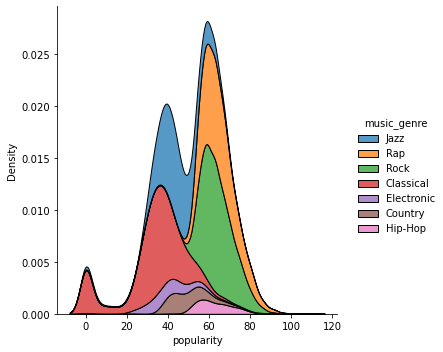

In [108]:
sns.displot(df, x="popularity", hue='music_genre', kind="kde", multiple='stack', fill=True)

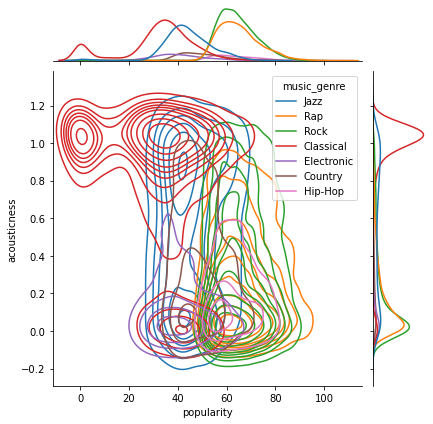

In [119]:
sns.jointplot(data=df, x="popularity", y="acousticness", hue='music_genre', kind="kde")

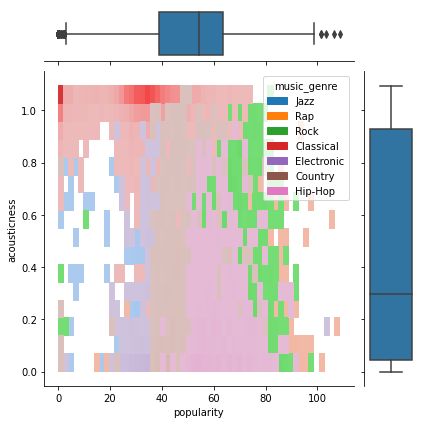

In [120]:
g = sns.JointGrid(data=df, x="popularity", y="acousticness",  hue="music_genre")
g.plot_joint(sns.histplot)
g.plot_marginals(sns.boxplot)

KeyboardInterrupt: ignored

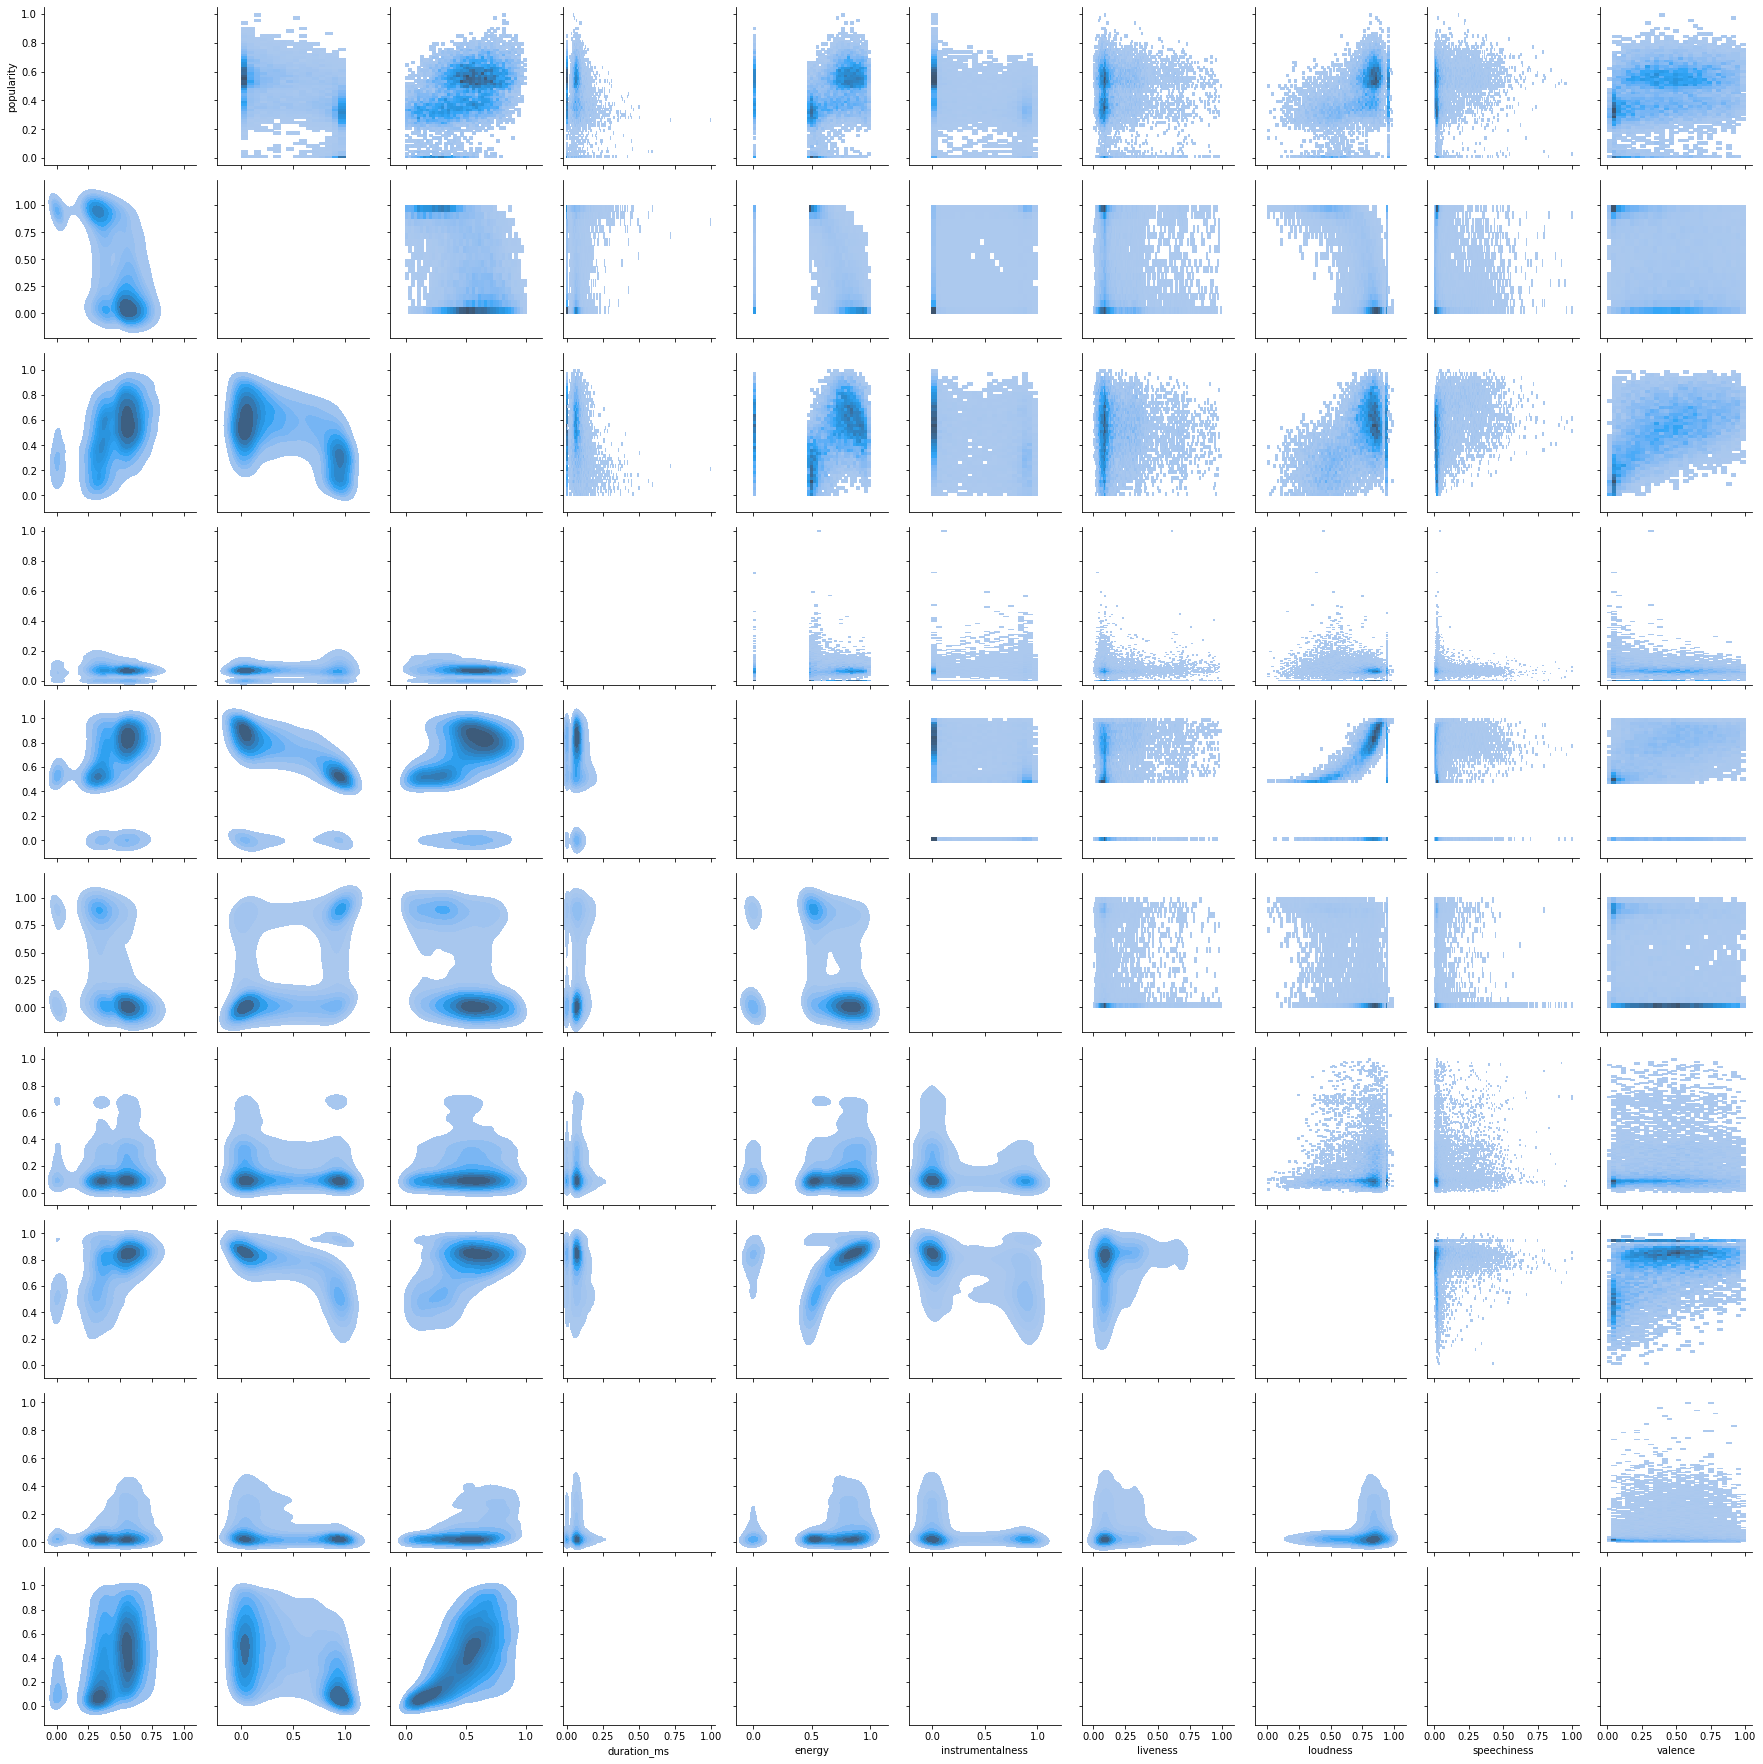

In [111]:
# g = sns.PairGrid(num_df)
# g.map_upper(sns.histplot)
# g.map_lower(sns.kdeplot, fill=True)
# g.map_diag(sns.histplot, kde=True)